<a href="https://colab.research.google.com/github/abhilashgnvsa/software-engineering-lab/blob/main/software%20engineering%20exp-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Waterfall Model


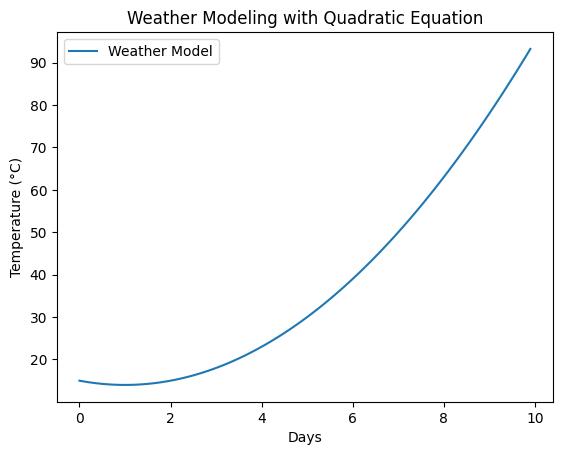

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def quadratic_weather_model(a, b, c, x):
    return a * x**2 + b * x + c


x_values = np.arange(0, 10, 0.1)
a, b, c = 1, -2, 15  # Example coefficients
y_values = quadratic_weather_model(a, b, c, x_values)


plt.plot(x_values, y_values, label="Weather Model")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.title("Weather Modeling with Quadratic Equation")
plt.legend()
plt.show()

2.Iterative Model

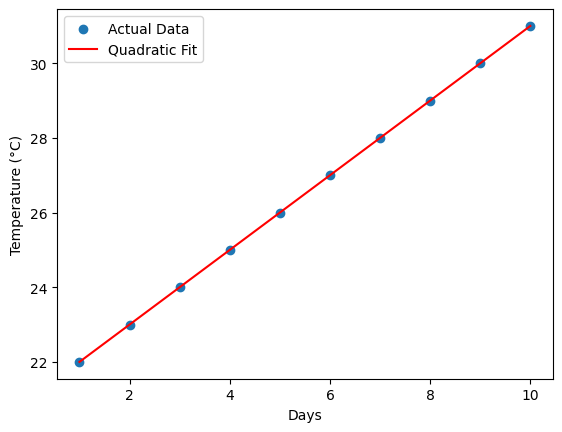

In [2]:
import pandas as pd


data = pd.read_csv('weather_data.csv')
x_values = data['Day']
y_values = data['Temperature']


coefficients = np.polyfit(x_values, y_values, 2)
a, b, c = coefficients


predicted_values = quadratic_weather_model(a, b, c, x_values)
plt.scatter(x_values, y_values, label="Actual Data")
plt.plot(x_values, predicted_values, label="Quadratic Fit", color="red")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


3.Agile Model

In [12]:
import requests
import json

def fetch_weather_data(api_url="https://samples.openweathermap.org/data/2.5/forecast/hourly?q=London,us&appid=b6907d289e10d714a6e88b30761fae22"):
    """
    Fetches weather data from a remote API.

    Args:
        api_url (str, optional): The API URL to fetch weather data.
            Defaults to a sample OpenWeatherMap API URL.

    Returns:
        tuple: A tuple containing two lists: days and temperatures.
    """
    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        data = response.json()
        # Assuming the API response structure - adjust if needed
        days = [entry['dt'] for entry in data['list']]
        temperatures = [entry['main']['temp'] for entry in data['list']]
        return days, temperatures
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return [], []
    except (KeyError, IndexError) as e:
        print(f"Error processing JSON data: {e}")
        return [], []

# Example usage:
# Using the default sample API URL
x_values, y_values = fetch_weather_data()

# or provide a different API URL
# api_url = "your_api_url"
# x_values, y_values = fetch_weather_data(api_url=api_url)